In [1]:
ls

wine.data  Wine_exercise.ipynb  wine.names


In [1]:
import re
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('wine.data')

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
# Finding col names from wine.names using Regex
names = []
w_names = open('wine.names')
for line in w_names:
    name = str(re.findall('[0-9]+\) ?[A-Z].*', line))
    name = name.replace('[]', '')
    name = name.split('\n')
    for line in name:
        if line.strip() != "":
            name = str(re.findall("[A-Z].+(?=')", line))
            name = name.replace("[", '')
            name = name.replace("]", '')
            name = name.replace("'", '')
            name = name.replace('  ', '')
            name = name.replace(' ', '_')
            names.append(name)
            

print(names)

['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']


In [5]:
# Adding Class name to names
names.insert(0, 'Class')
names

['Class',
 'Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity_of_ash',
 'Magnesium',
 'Total_phenols',
 'Flavanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280/OD315_of_diluted_wines',
 'Proline']

In [6]:
# Convert names into series
names = pd.Series(names)

In [7]:
names

0                            Class
1                          Alcohol
2                       Malic_acid
3                              Ash
4                Alcalinity_of_ash
5                        Magnesium
6                    Total_phenols
7                       Flavanoids
8             Nonflavanoid_phenols
9                  Proanthocyanins
10                 Color_intensity
11                             Hue
12    OD280/OD315_of_diluted_wines
13                         Proline
dtype: object

In [8]:
# Rereading data with columns name attached
wine_df = pd.read_csv('wine.data', names = names)

In [9]:
wine_df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# Checking file for finding missing values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

**All columns are fine (no missing)**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Class', ylabel='count'>

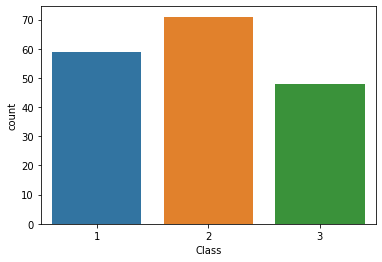

In [13]:
# How many Classes does the data has and their counts (it is somehow balanced!)
sns.countplot(x ='Class', data= wine_df)

## Plotting with PCA and T-SNE

### PCA

In [12]:
wine_df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [14]:
scaler = MinMaxScaler()

In [15]:
X = wine_df.drop('Class', axis = 1).values

In [16]:
scaler.fit(X)
X = scaler.transform(X)

In [17]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
pca_df = pd.concat([pca_df, wine_df[['Class']]], axis = 1)

In [18]:
pca_df.head()

,PC 1,PC 2,Class
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1


Text(0.5, 1.0, 'PCA plot')

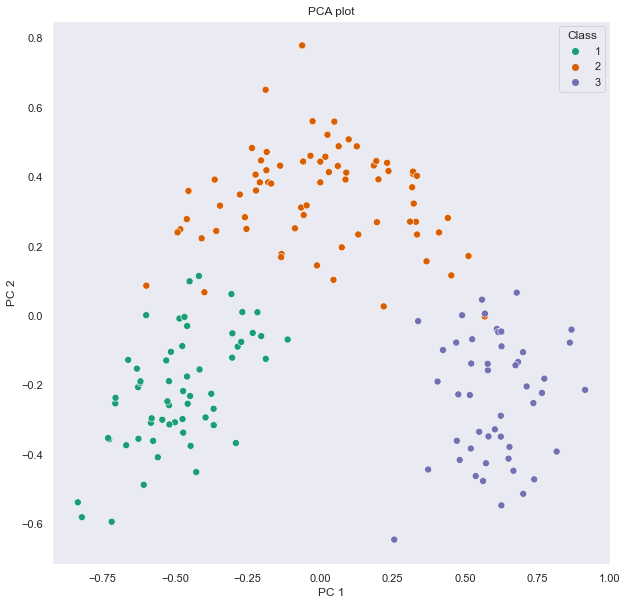

In [19]:
plt.figure(figsize=(10,10))
sns.set_theme(style='dark')
sns.scatterplot(x= 'PC 1', y = 'PC 2', data = pca_df, hue = 'Class', palette = 'Dark2', s = 50);
plt.title('PCA plot')

### T-SNE

In [20]:
from sklearn.manifold import TSNE

In [21]:
t = TSNE(n_components=2, learning_rate=100)
tsne = t.fit_transform(X)
tsne_df = pd.DataFrame(data = tsne, columns = ['TSNE 1', 'TSNE 2'])
tsne_df = pd.concat([tsne_df, wine_df[['Class']]], axis = 1)
tsne_df.head()

,TSNE 1,TSNE 2,Class
0,10.165646,-3.799287,1
1,7.099038,-3.146314,1
2,8.008637,-7.162515,1
3,10.847840,-6.711021,1
4,3.439915,-6.628424,1


Text(0.5, 1.0, 'T-SNE plot')

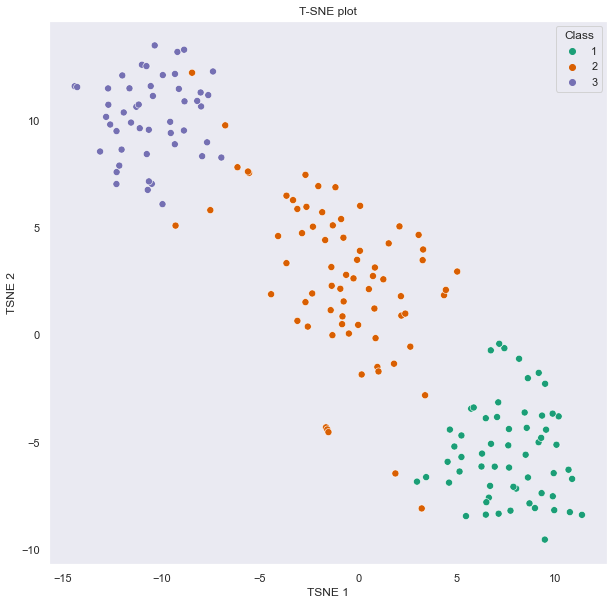

In [22]:
plt.figure(figsize=(10,10))
sns.set_theme(style='dark')
sns.scatterplot(x= 'TSNE 1', y = 'TSNE 2', data = tsne_df, hue = 'Class', palette= 'Dark2', s=50);
plt.title('T-SNE plot')

# Correlation matrix

In [25]:
wine_df.corr()['Class'].sort_values()

Flavanoids                     -0.847498
OD280/OD315_of_diluted_wines   -0.788230
Total_phenols                  -0.719163
Proline                        -0.633717
Hue                            -0.617369
Proanthocyanins                -0.499130
Alcohol                        -0.328222
Magnesium                      -0.209179
Ash                            -0.049643
Color_intensity                 0.265668
Malic_acid                      0.437776
Nonflavanoid_phenols            0.489109
Alcalinity_of_ash               0.517859
Class                           1.000000
Name: Class, dtype: float64

In [49]:
# plots

<AxesSubplot:>

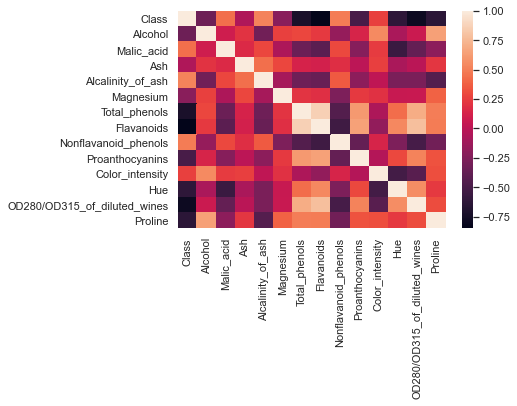

In [26]:
# Heatmap
sns.heatmap(wine_df.corr())

<AxesSubplot:>

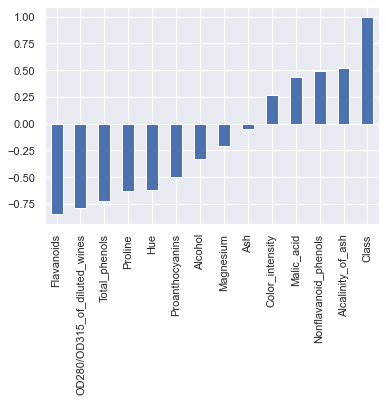

In [27]:
# Bar chart
wine_df.corr()['Class'].sort_values().plot(kind = 'bar')

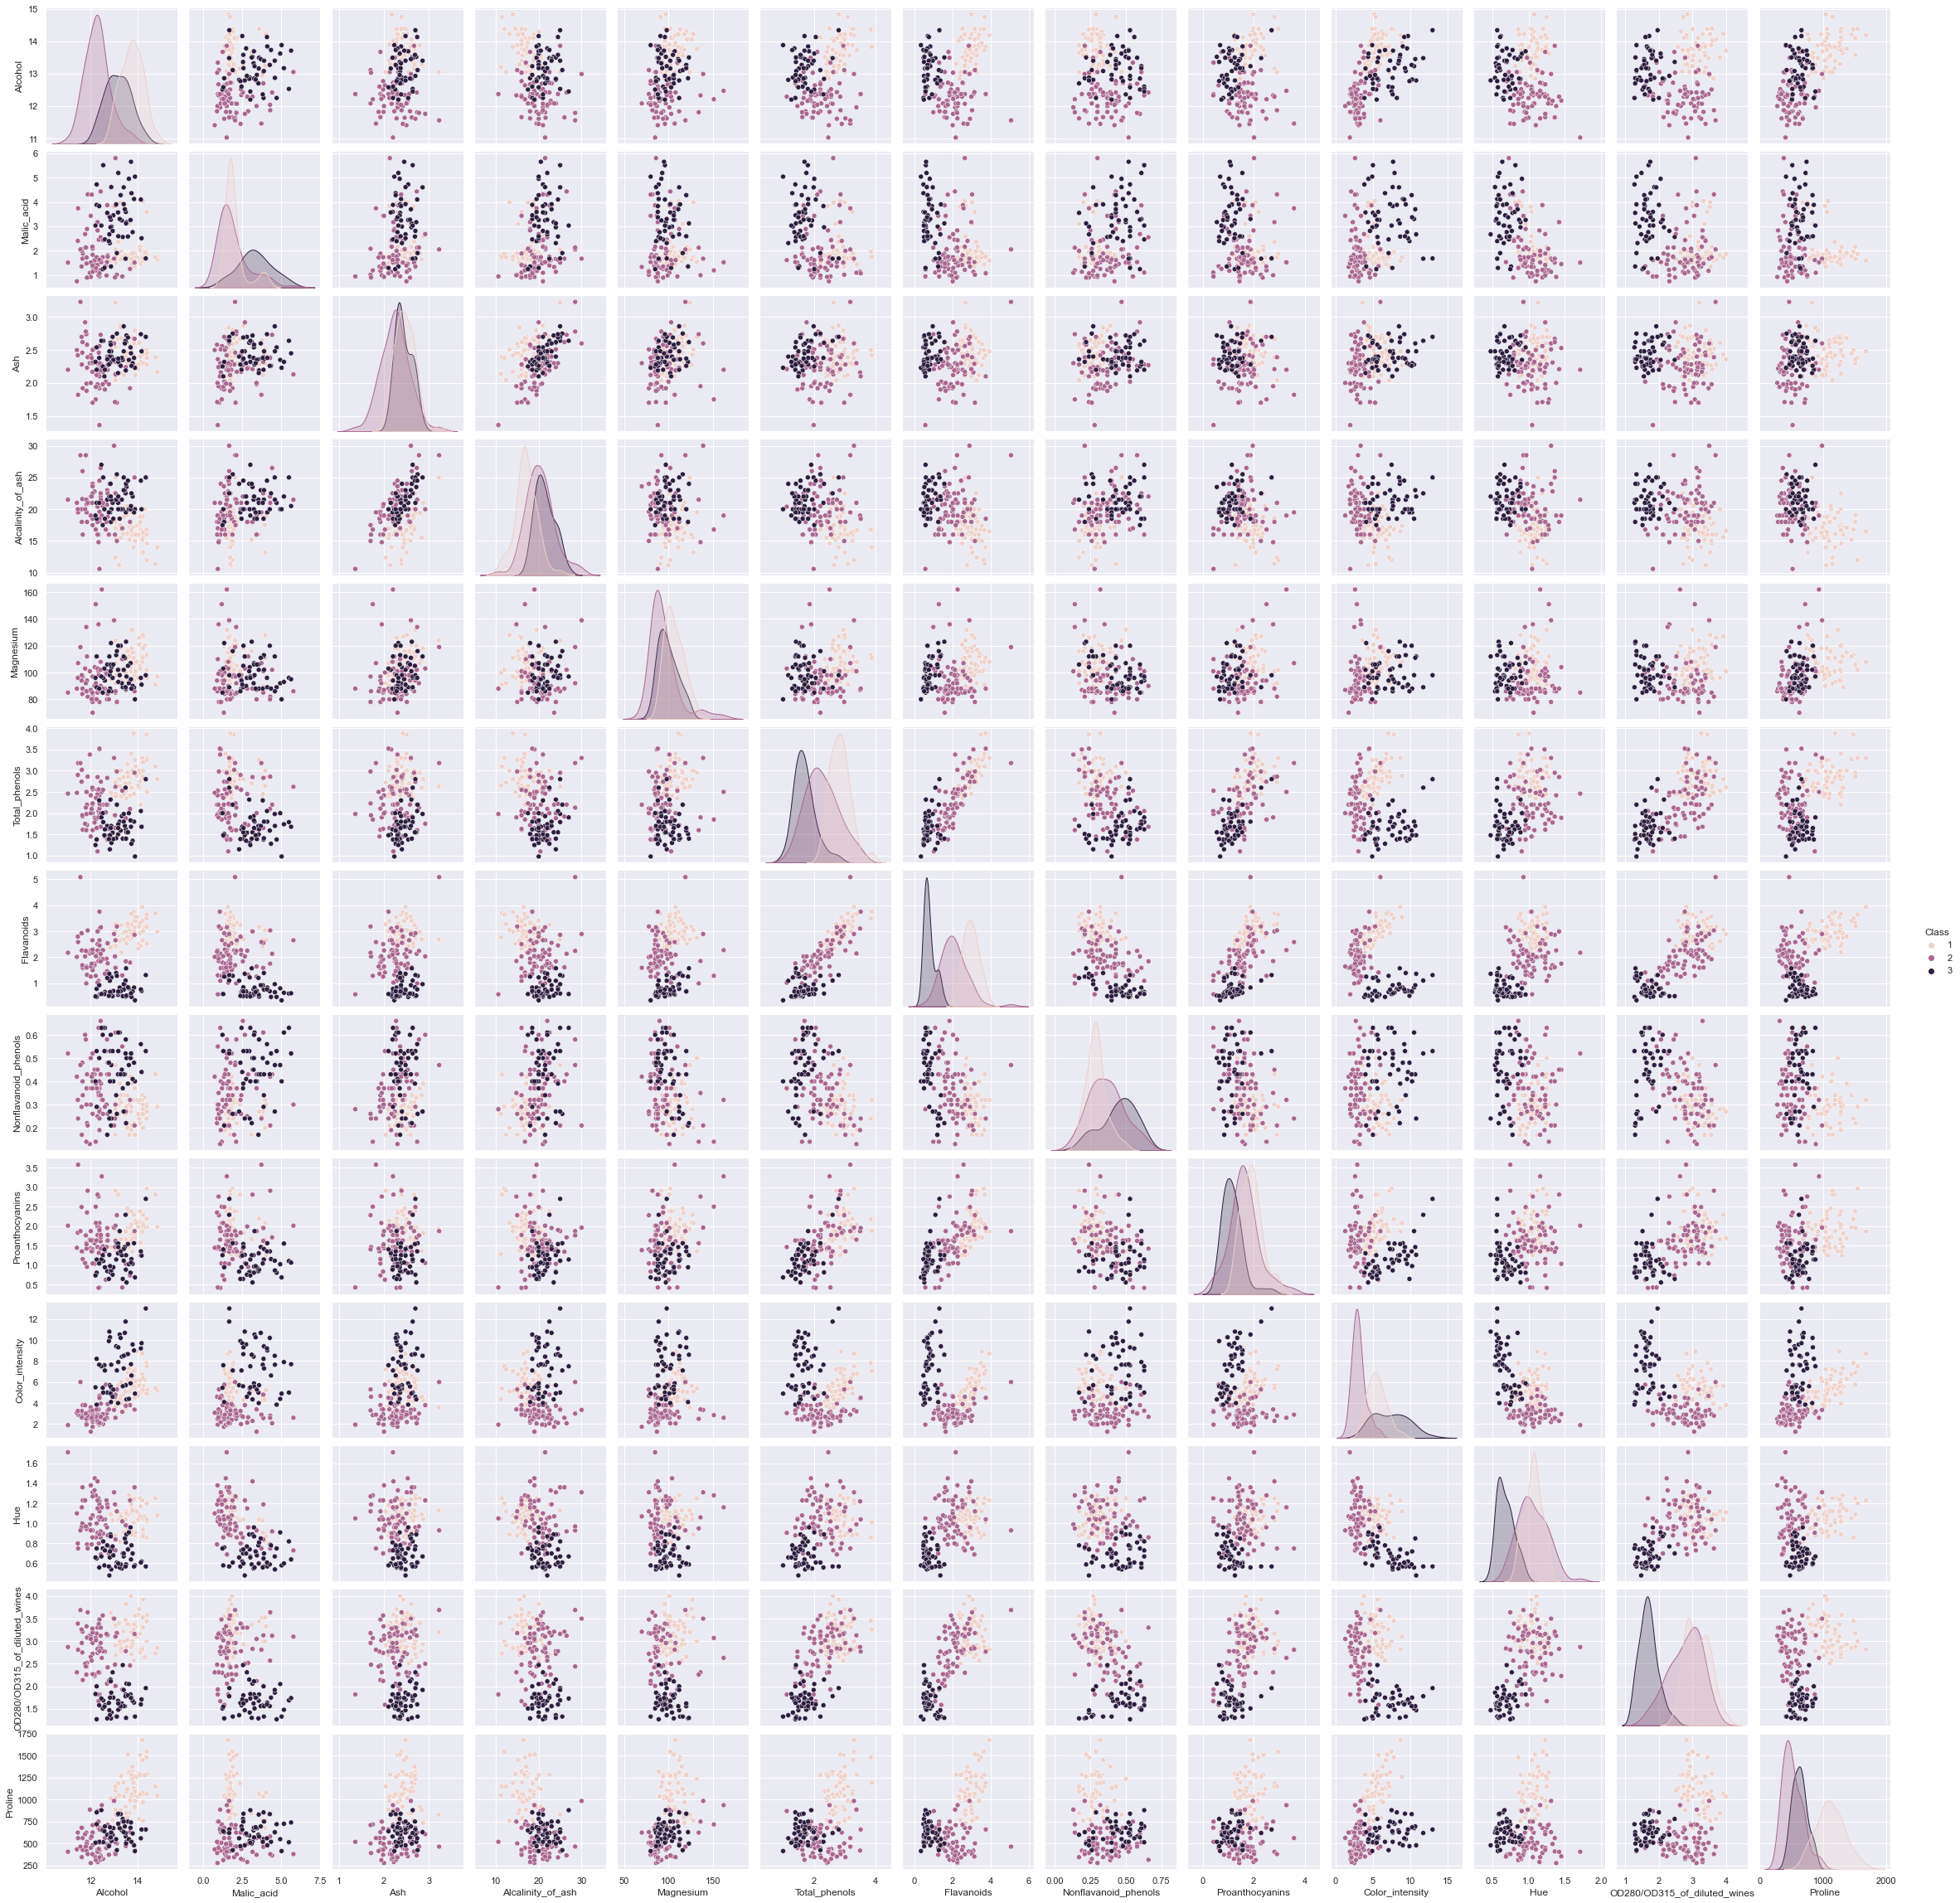

In [53]:
sns.pairplot(wine_df, hue='Class')

### Interpretation
**1)** Flavanoids, OD280/OD315_of_diluted_wines, Total_phenols, Proline, Hue, Proanthocyanins, and Magnesium are negatively correlated with the class, which means one unit increase in their values can affect one unit in class negatively. However, for Malic_acid, Nonflavanoid_phenols, and Alcalinity_of_ash this effect is positive. 

**2)** Ash has a correlation value of -0.049643, which shows a small negative effect on the class. For constructing prediction models, in both ML or DL, we can remove Ash, but here I include it in my ANN model.

# Machine learning models 

## Random forest

###  Train and Test split

In [28]:
X = wine_df.drop('Class', axis = 1).values
y = wine_df['Class'].values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 101)

In [31]:
# scaling the splited data (fitting just on X_train)
scaler.fit(X_train)

MinMaxScaler()

In [32]:
# Apply transformation on X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# import libray
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Fitting Random forest classification to the training set with 10 trees
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 101)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

In [36]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  1,  0],
       [ 0, 16,  1],
       [ 0,  0, 11]])

In [38]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 101)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  1,  0],
       [ 0, 16,  1],
       [ 0,  0, 11]])

In [88]:
# Result: incresing the number of trees has no effect


### Model evaluation

In [39]:
y_pred

array([1, 1, 3, 1, 3, 2, 3, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 3,
       3, 3, 1, 1, 2, 2, 3, 2, 3, 2, 3, 1, 1, 1, 1, 2, 2, 3, 2, 1, 1, 2,
       3])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.94      0.94      0.94        17
           3       0.92      1.00      0.96        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [90]:
### ROC AUC score for random forest classifier

In [41]:
y_pred_prob = classifier.predict_proba(X_test)

In [42]:
roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

0.9992997198879552

## Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC

In [44]:
# SVM with a linear kernel 
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [45]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]])

In [46]:
# evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [47]:
y_pred_prob = classifier.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

1.0

### Result: SVM classifier (with linear kernel) did the perfect job 

# Neural Network Models

## ANN

In [48]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
wine_df['Class'] = labelencoder_X_1.fit_transform(wine_df['Class'])

In [50]:

X = wine_df.drop('Class', axis = 1).values
y = wine_df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 101)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
X_train.shape

(133, 13)

In [52]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [53]:
model = Sequential()
# input
model.add(Dense(units = 13, activation = 'relu'))
# hidden layer
model.add(Dense(units = 6, activation = 'relu'))
# output layer
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [54]:
model.fit(x= X_train,
          y= y_train,
          epochs = 100,
          validation_data = (X_test, y_test),
          verbose = 1 
)

Epoch 1/100
5/5 [==============================] - 1s 41ms/step - loss: 1.1050 - val_loss: 1.0682
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0868 - val_loss: 1.0544
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0697 - val_loss: 1.0419
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0538 - val_loss: 1.0298
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0388 - val_loss: 1.0181
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0243 - val_loss: 1.0075
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0114 - val_loss: 0.9977
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9981 - val_loss: 0.9874
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 0.9851 - val_loss: 0.9769
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 0.9720 - val_loss: 0.9653
Epoch 11/100
5/5 [==========

<AxesSubplot:>

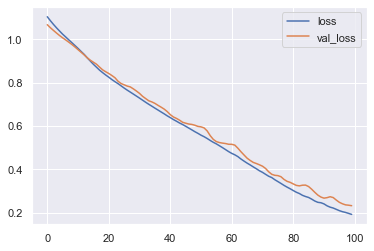

In [55]:
# plot history
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [158]:
# It seems that we have overfitting
# We can use some methods to takle it (following)


## Early stopping 

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
# We can monitor val_loss to see it decreases or not after 25 epochs stop the training
early_stop = EarlyStopping(monitor= 'val_loss', mode= 'min', patience = 5, verbose = 1)

In [58]:
# Train model agian with callbacks parameter
model.fit(x= X_train,
          y= y_train,
          epochs = 100,
          validation_data = (X_test, y_test),
          callbacks= [early_stop],
          verbose = 1 
)

Epoch 1/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1874 - val_loss: 0.2236
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1842 - val_loss: 0.2165
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1836 - val_loss: 0.2099
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1791 - val_loss: 0.2071
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1732 - val_loss: 0.2081
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1684 - val_loss: 0.2078
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1650 - val_loss: 0.2063
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1619 - val_loss: 0.2022
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1582 - val_loss: 0.1998
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1549 - val_loss: 0.1927
Epoch 11/100
5/5 [==========

<AxesSubplot:>

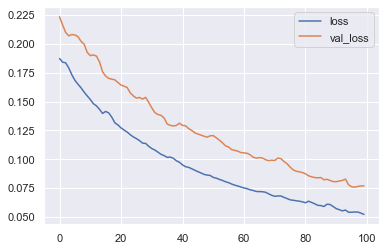

In [59]:
# plot history to see the change
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Dropout 

In [60]:
# Inactivating some percentage of neurons in each epoch
model = Sequential()
model.add(Dense(units = 13, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [61]:
early_stop = EarlyStopping(monitor= 'val_loss', mode= 'min', patience = 3, verbose = 1)

In [62]:
model.fit(x= X_train,
          y= y_train,
          epochs = 100,
          validation_data = (X_test, y_test),
          callbacks= [early_stop],
          verbose = 1 
)

Epoch 1/100
5/5 [==============================] - 0s 32ms/step - loss: 1.1083 - val_loss: 1.0754
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0713 - val_loss: 1.0651
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0613 - val_loss: 1.0543
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0490 - val_loss: 1.0431
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0686 - val_loss: 1.0314
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0320 - val_loss: 1.0199
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0156 - val_loss: 1.0077
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0016 - val_loss: 0.9958
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 0.9935 - val_loss: 0.9840
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9831 - val_loss: 0.9731
Epoch 11/100
5/5 [==========

<AxesSubplot:>

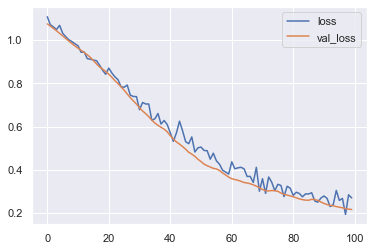

In [63]:
# plot history to see the change
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [218]:
# The model trained with all epochs (100), and dropout could overcome the overfitting problem

In [219]:
# Model evaluation

In [64]:

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_test, axis = 1)
y_test_class = np.argmax(y_pred, axis = 1)

In [65]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.82      0.93      0.87        15
           2       1.00      0.85      0.92        13

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [66]:
print(confusion_matrix(y_test_class, y_pred_class))

[[16  1  0]
 [ 1 14  0]
 [ 0  2 11]]


In [67]:
# ROC AUC
y_pred_prob = model.predict(X_test)
roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

0.992296918767507

## Result: Using droupout, method the ANN model did the perfect job by having just one mistake